# Lecture 10: Expectation Continued


## Stat 110, Prof. Joe Blitzstein, Harvard University

----

## A Proof of Linearity (discrete case)

Let $T = X + Y$, and show that $\mathbb{E}(T) = \mathbb{E}(X) + \mathbb{E}(Y)$.

We will also show that $\mathbb{E}(cX) = c \mathbb{E}(X)$.

In general, we'd like to be in a position where

\begin{align}
  \sum_{t} t P(T=t) \stackrel{?}{=} \sum_{x} x P(X=x) + \sum_{y} y P(Y=y)
\end{align}

so, let's try attacking this from the l.h.s.

![title](images/L1001.png)

Considering the image above of a discrete r.v. in Pebble World, note that


\begin{align}
  \mathbb{E}(X) &= \sum_{x} x P(X=x) & &\text{grouping the pebbles per X value; weighted average} \\
  &= \sum_{s}X(s)P(\{s\}) & &\text{ungrouped; sum each pebble separately} \\
  \\
  \\
  \Rightarrow \mathbb{E}(T) &= \sum_{s} (X+Y)(s)P(\{s\}) \\
  &= \sum_{s}X(s)P(\{s\}) + \sum_{s}Y(s)P(\{s\}) \\
  &= \sum_{x} x P(X=x) + \sum_{y} y P(Y=y) \\
  &= \mathbb{E}(X) + \mathbb{E}(Y) ~~~~ \blacksquare \\
  \\
  \\
  \Rightarrow \mathbb{E}(cX) &= \sum_{x} cx P(X=x) \\
  &= c \sum_{x} x P(X=x) \\
  &= c \mathbb{E}(X) ~~~~ \blacksquare
\end{align}

----

## Negative Binomial Distribution

### Description

A misnomer: this distribution is actually non-negative, and neither is it binomial.

The Negative Binomial is a generalization of the Geometric distribution, where we have a series of independent $Bern(p)$ trials and we want to know # failures before the r<sup>th</sup> success.

We can codify this using a bit string:

\begin{align}
  & \text{1000100100001001} & \text{0 denotes failure, 1 denotes success} & \\
  & r = 5 \\
  & n = 11 & \text{failures} 
\end{align}

Note that the very last bit position is, of course, a success.

Note also that we can permutate the preceding $r-1$ successes amongst the $n+r-1$ slots that come before that final r<sup>th</sup> success.

### Notation

$X \sim \operatorname{NB}(r,p)$

### Parameters

* $r$ - the total number of successes before we stop counting
* $p$ - probability of success

### Probability mass function

\begin{align}
  P(X=n) &= \binom{n+r-1}{r-1}  p^r (1-p)^n & &\text{for } n = 0,1,2,\dots\\
  &= \binom{n+r-1}{n}  p^r (1-p)^n & &\text{or conversely}\\
\end{align}

### Expected value

Let $X_j$ be the # failures before the $(j-1)^{\text{st}}$ and $j^{\text{th}}$ success. Then we could write

\begin{align}
  \mathbb{E}(X) &= \mathbb{E}(X_1 + X_2 + \dots + X_r) \\
                &= \mathbb{E}(X_1) + \mathbb{E}(X_2) + \dots + \mathbb{E}(X_r) & &\text{by Linearity} \\
                &= r \mathbb{E}(X_1) & &\text{by symmetry} \\
                &= r \frac{q}{p} ~~~~ \blacksquare
\end{align}

----

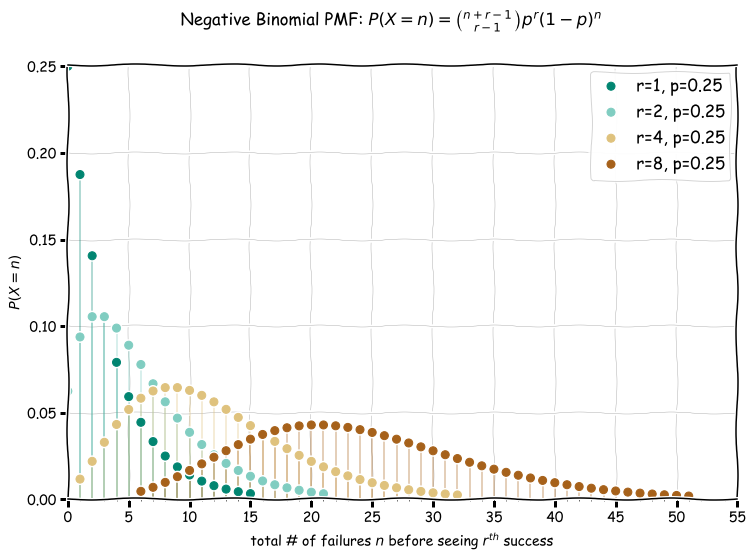

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.stats import nbinom

%matplotlib inline

plt.xkcd()
_, ax = plt.subplots(figsize=(12,8))

# seme Negative Binomial parameters
r_values = [1, 2, 4, 8]
p_values = [0.25]*len(r_values)
#p_values = [0.25, 0.24, 0.23, 0.22]
params = list(zip(r_values, p_values))

# colorblind-safe, divergent color scheme
colors = ['#018571', '#80cdc1', '#dfc27d', '#a6611a']

for i,(r,p) in enumerate(params):
    x = np.arange(nbinom.ppf(0.01, r, p), nbinom.ppf(0.99, r, p))
    pmf = nbinom.pmf(x, r, p)
    ax.plot(x, pmf, 'o', color=colors[i], ms=8, label='r={}, p={}'.format(r,p))
    ax.vlines(x, 0, pmf, lw=2, color=colors[i], alpha=0.3)

# legend styling
legend = ax.legend()
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)

# y-axis
ax.set_ylim([0.0, 0.251])
ax.set_ylabel(r'$P(X=n)$')

# x-axis
ax.set_xlim([0, 55])
ax.set_xlabel(r'total # of failures $n$ before seeing $r^{th}$ success')

# x-axis tick formatting
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)

ax.grid(color='grey', linestyle='-', linewidth=0.3)

plt.suptitle(r'Negative Binomial PMF: $P(X=n) = \binom{n+r-1}{r-1}  p^r (1-p)^n$')

plt.show()

## Revisting the Geometric: the First Success Distribution

$X \sim \operatorname{FS}(p)$ is the geometric distribution that counts the trials until first success, *including that first success*.

Let $Y = X - 1$. 

Then $Y \sim \operatorname{Geom}(p)$

Expected value of $\operatorname{FS}(p)$ is

\begin{align}
  \mathbb{E}(X) &= E(Y) + 1 \\
                &= \frac{q}{p} + 1 \\
                &= \boxed{\frac{1}{p}}
\end{align}

----

## Putnam Problem

Consider a random permutation of $1, 2, 3, \dots , n$, where $n \ge 2$.

Find expected # local maxima. For example, given the permuation $\boxed{3} ~~ 2 ~~ 1 ~~ 4 ~~ \boxed{7} ~~ 5 ~~ \boxed{6}$ we have 3 local maxima:

- $\boxed{3} \gt 2$
- $4 \lt \boxed{7} \gt 5$
- $ 5 \lt \boxed{6}$

Now, there are 2 kinds of cases we need to consider:

- non-edge case: $4 ~~ \boxed{7} ~~ 5$ has probability of $\frac{1}{3}$ that the largest number is in the middle position
- edge case: in both left-edge $\boxed{3} ~~ 2$ and right-edge $5 ~~ \boxed{6}$, the probability that the larger number is in the right position is $\frac{1}{2}$

Let $I_j$ be the indicator r.v. of position $j$ having a local maximum, $1 \le j \le n$.

Using Linearity, we can say that the expected number of local maxima is given by

\begin{align}
  \mathbb{E}(I_j) &= \mathbb{E}(I_1 + I_2 + \dots + I_n) \\
                  &= \mathbb{E}(I_1) + \mathbb{E}(I_2) + \dots + \mathbb{E}(I_n) & &\text{by Linearity} \\
                  &= (n-2) \frac{1}{3} + 2 \frac{1}{2} \\
                  &= \boxed{\frac{n+1}{3}}
\end{align}

Idiot-checking this, we have:

\begin{align}
  \mathbb{E}(I_{n=2}) &= \frac{2+1}{3} & &\text{... case where } n=2 \\
  &= 1 \\
  \\
  \\
  \mathbb{E}(I_{n=\infty}) &= \frac{\infty+1}{3} & &\text{... case where } n= \infty \\
  &= \infty \\
\end{align}

----

## St. Petersburg Paradox

Consider a game of chance involving a fair coin. We will flip the coin until the very first heads shows (hypergeometric distribution). 

- If heads shows on the very first flip, you get $\$2$.
- If the first heads shows on the second flip, you get $\$4$.
- If the first heads shows on the third flip, you get $\$8$.

So you will get $\$2^n$ if the first heads shows up on the n<sup>th</sup> trial, including the heads flip.

_How much would you be willing to pay to play this game?_

Let's tackle this by thinking about the expected amount of $\$\$\$$ we stand to make. 

Given $Y = 2^n$, find $\mathbb{E}(Y)$:

\begin{align}
  \mathbb{E}(Y) &= \sum_{k=1}^\infty 2^k \frac{1}{2^{k-1}} ~ \frac{1}{2}\\
                &= \sum_{k=1}^\infty 2^k \frac{1}{2^k}\\
                &= \sum_{k=1}^\infty 1\\
  \\
  \\
  \mathbb{E}(Y_{k=40}) &= \sum_{k=1}^{40} 1 \\
                       &= 40
\end{align}

So, the "paradox" here is that even if we capped the payout to $2^{40} \approx \$1000000000$, Linearity shows us we would only pay $40. It is very hard to grasp this, but the truth is that if you were offered this game at any price, you should take it.

----

View [Lecture 10: Expectation Continued | Statistics 110](http://bit.ly/2vXxPsj) on YouTube.